In [1]:
%matplotlib inline
from pprint import pprint

import plot
import simulate
import harvesting
import market
import withdrawal
import metrics

from decimal import Decimal

import itertools
import math
import pandas
import scipy.stats

In [3]:
YEARS = 30

df = pandas.DataFrame(index=range(1, YEARS+1))

MARKET = market.Returns_US_1871()
for i in range(MARKET.start_year, 2017-YEARS):
    s = simulate.withdrawals(MARKET.iter_from(i), years=YEARS, harvesting=harvesting.N_60_RebalanceHarvesting, withdraw=lambda p, h: withdrawal.ConstantDollar(p, h, Decimal('.041')))
    pvs = [int(n.portfolio_post.value_n) for n in s]
    df[i] = pvs

In [4]:
count = 0
for i in range(MARKET.start_year, 2017-YEARS):
    if df.T[1][i] > df.T[10][i]:
        print(i, df.T[10][i])
        count += 1
print(count)

1880 1113058
1881 853790
1885 1054694
1886 853688
1887 834177
1888 967274
1905 926609
1906 928896
1908 1117035
1909 894899
1910 898436
1911 776146
1912 771971
1913 885395
1916 990077
1928 941194
1929 791835
1930 851066
1965 786245
1966 860376
1968 874371
1969 820557
1972 924693
23


In [5]:
data = df.T[16]
y2k_port = data[2000]

fig, ax1 = plot.plt.subplots()
plot.format_axis_labels_with_commas(ax1.get_yaxis())
ax1.plot([1871, 2000], [y2k_port, y2k_port])
plot.plt.xlabel('Year of retirement')
plot.plt.ylabel('Real $$$')
plot.plt.title('Portfolio value after 16 years')
graph = plot.seaborn.tsplot(data, time=data.index)

KeyError: 2000

/home/justus/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


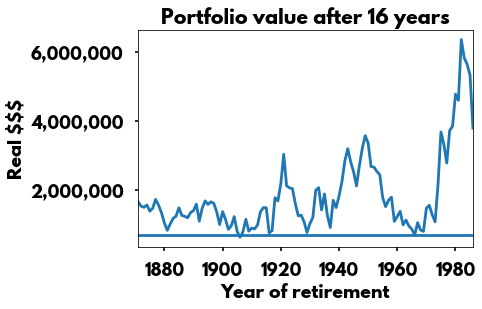

In [7]:
data = df.T[16]
y2k_port = data[1966]

fig, ax1 = plot.plt.subplots()
plot.format_axis_labels_with_commas(ax1.get_yaxis())
ax1.plot([1871, 2000], [y2k_port, y2k_port])
plot.plt.xlabel('Year of retirement')
plot.plt.ylabel('Real $$$')
plot.plt.title('Portfolio value after 16 years')
graph = plot.seaborn.tsplot(data, time=data.index)

In [10]:
df.T[20][1966]

594289